# Demo Linear Regression model

### Dependencies

In [1]:
from pathlib import Path
import sys

In [ ]:
digital_twin_root = Path().cwd().parent
sys.path.append(str(digital_twin_root))

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    r2_score
)

from digital_twin.data_preparation.splitting_data import simple_split
from digital_twin.evaluation.data_metrics import DataMetrics
from digital_twin.metrics.regression_metrics import RegressionMetrics
from digital_twin.models.linear_regression_model import LinearRegressionModel

### Load data

In [ ]:
filename = "test_car_csv.csv"
path_to_data = Path().cwd().parent / "data"
path_to_file = path_to_data / "datasets" / filename

In [5]:
df = pd.read_csv(path_to_file)

In [6]:
df.head()

,year_of_manufacture,kilometers,engine_type,transmission_type,service_visits,car_brand,region,body_damage,engine_size,number_of_owners,car_color,tire_condition,market_value,failure_probability,failure_category
0,1994,49602,diesel,robotic,11,BMW,Central,medium,3.7,5,black,worn,1624500.00,0.10,Very Low
1,2018,493669,electric,robotic,1,Hyundai,Central,minor,5.1,3,white,worn,1545887.50,0.52,Medium
2,1991,340205,electric,automatic,5,BMW,South,severe,5.8,5,black,average,1571360.00,0.55,Medium
3,2007,371282,diesel,robotic,0,Mercedes,North,minor,1.5,1,red,average,1058181.25,0.35,Low
4,2017,141039,electric,automatic,13,BMW,Central,minor,4.5,1,black,worn,1673710.00,0.05,Very Low


### Data validation

In [7]:
data_metrics = DataMetrics()

In [8]:
data_metrics.validation(df, ["market_value", "failure_category", "failure_probability"])

True

### Build model

In [9]:
model = LinearRegressionModel()

In [10]:
data = simple_split(df.drop(columns=["failure_probability", "failure_category"], axis=1), ["market_value"], 0.2)

In [11]:
cat_features = ["engine_type", "transmission_type", "car_brand", "region", "body_damage", "car_color", "tire_condition"]

In [12]:
model.train(data["x_train"], data["y_train"], cat_features)

### Results

In [13]:
def evaluate_regression(y_true: pd.Series, y_pred: pd.Series) -> dict:
    mse = mean_squared_error(y_true, y_pred)
    return {
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mse,
        "rmse": np.sqrt(mse),
        "r2": r2_score(y_true, y_pred)
    }

def print_metrics(metrics: dict):
    for name, value in metrics.items():
        print(f"{name:>10}: {value:.4f}")

In [14]:
def plot_metrics(metrics: dict, title: str = "Model Metrics"):
    plt.figure(figsize=(10, 5))

    if not metrics:
        print("No data for visualisation!")
        return

    names = list(metrics.keys())
    values = list(metrics.values())

    clean_values = [0 if v is None or np.isnan(v) else v for v in values]

    bars = plt.bar(names, clean_values, color="skyblue")

    for bar, val in zip(bars, clean_values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f"{val:.3f}",
                ha="center", va="bottom")

    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    max_val = max(clean_values) if clean_values else 1
    plt.ylim(0, max_val * 1.15)

    plt.tight_layout()
    plt.show()

In [15]:
y_pred = model.predict(data["x_test"])


---Metrics---

       mae: 36847.4687
       mse: 2457792498.4617
      rmse: 49576.1283
        r2: 0.9834


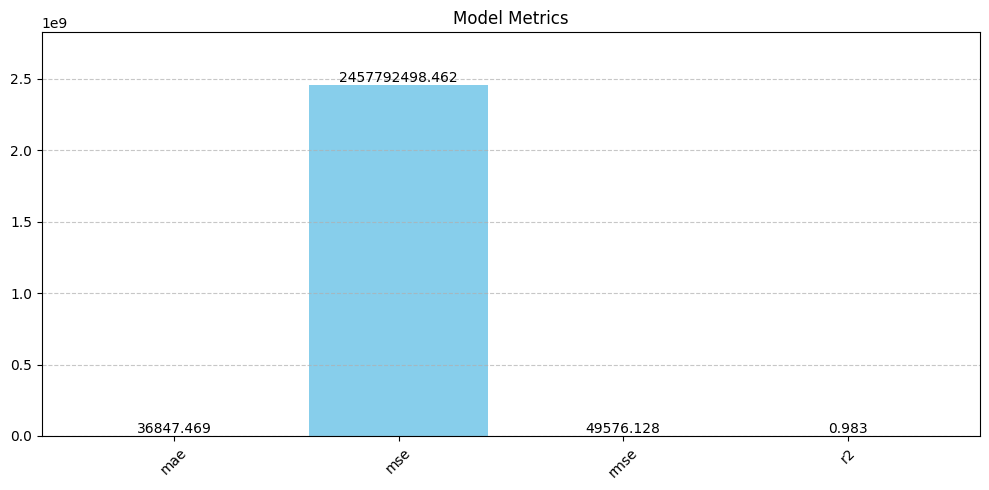

In [16]:
print("\n---Metrics---\n")
metrics = evaluate_regression(data["y_test"], y_pred)
print_metrics(metrics)
plot_metrics(metrics)

### Metrics from the project

In [17]:
metrics = RegressionMetrics.evaluate_all(data["y_test"], y_pred)
print(metrics)

{'mae': 36847.46868318934, 'mse': 2457792498.461699, 'rmse': np.float64(49576.128312542714), 'r2': 0.9833740191277539, 'mape': np.float64(27.430595019171243)}
